In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

from IPython.display import display, HTML


In [2]:
PATH = '/storage/CheXpert-v1.0-small/'

In [3]:
train_df = pd.read_csv(f'{PATH}train.csv')
valid_df = pd.read_csv(f'{PATH}valid.csv')
train_df.isna().sum()

Path                               0
Sex                                0
Age                                0
Frontal/Lateral                    0
AP/PA                          32387
No Finding                    201033
Enlarged Cardiomediastinum    178575
Cardiomegaly                  177211
Lung Opacity                  105636
Lung Lesion                   211470
Edema                         137458
Consolidation                 152792
Pneumonia                     195806
Atelectasis                   154971
Pneumothorax                  144480
Pleural Effusion               90203
Pleural Other                 216922
Fracture                      211220
Support Devices               100197
dtype: int64

In [4]:
len(train_df), len(valid_df)


(223414, 234)

In [5]:
label_cols = ['No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity',
       'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
       'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture',
       'Support Devices']
print(train_df['Atelectasis'].value_counts(dropna=False))
# print(train_df['Pneumothorax'].value_counts(dropna=False))
# print(train_df['Pneumonia'].value_counts(dropna=False))
print(train_df['Frontal/Lateral'].value_counts(dropna=False))
print(train_df['AP/PA'].value_counts(dropna=False))
print(train_df['Sex'].value_counts(dropna=False))
train_df.columns

 NaN    154971
-1.0     33739
 1.0     33376
 0.0      1328
Name: Atelectasis, dtype: int64
Frontal    191027
Lateral     32387
Name: Frontal/Lateral, dtype: int64
AP     161590
NaN     32387
PA      29420
LL         16
RL          1
Name: AP/PA, dtype: int64
Male       132636
Female      90777
Unknown         1
Name: Sex, dtype: int64


Index(['Path', 'Sex', 'Age', 'Frontal/Lateral', 'AP/PA', 'No Finding',
       'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity',
       'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
       'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture',
       'Support Devices'],
      dtype='object')

### Number of diseases (confirmed positive)
To get number of diseases in an Xray, I first replace the -1.0 with 0, so that when I sum across columns, I am only summing the 1.0 values. Then this column result is put ito the original train and valid dataframes.

#### Support Devices is not considered a finding according to the data. See more in cells below

In [6]:
# number of diseases (sum the 1.0, except the no finding column)
# make a temp df where -1.0 is changed to 0, NAN is filled with 0, do the sum, then put that column into original df
temp_train = train_df[label_cols].replace([-1.0],0.0)
temp_train = temp_train.fillna(0.0)
temp_valid = valid_df[label_cols].replace([-1.0],0.0)
temp_valid = temp_valid.fillna(0.0)
## Support Devices is not considered a finding according to the data. see more in cells below
train_df['Number of Diseases'] = temp_train[['Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity',
       'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
       'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture']].astype(int).sum(axis=1)
print(train_df.head(2))
valid_df['Number of Diseases'] = temp_valid[['Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity',
       'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
       'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture']].astype(int).sum(axis=1)
valid_df.head(3)

                                                Path     Sex  Age  \
0  CheXpert-v1.0-small/train/patient00001/study1/...  Female   68   
1  CheXpert-v1.0-small/train/patient00002/study2/...  Female   87   

  Frontal/Lateral AP/PA  No Finding  Enlarged Cardiomediastinum  Cardiomegaly  \
0         Frontal    AP         1.0                         NaN           NaN   
1         Frontal    AP         NaN                         NaN          -1.0   

   Lung Opacity  Lung Lesion  Edema  Consolidation  Pneumonia  Atelectasis  \
0           NaN          NaN    NaN            NaN        NaN          NaN   
1           1.0          NaN   -1.0           -1.0        NaN         -1.0   

   Pneumothorax  Pleural Effusion  Pleural Other  Fracture  Support Devices  \
0           0.0               NaN            NaN       NaN              1.0   
1           NaN              -1.0            NaN       1.0              NaN   

   Number of Diseases  
0                   0  
1                   2  


,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,Number of Diseases
0,CheXpert-v1.0-small/valid/patient64541/study1/...,Male,73,Frontal,AP,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1,CheXpert-v1.0-small/valid/patient64542/study1/...,Male,70,Frontal,PA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2,CheXpert-v1.0-small/valid/patient64542/study1/...,Male,70,Lateral,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


In [7]:
#not getting in place to work so ... using the loop to replace NAN with 0.0, but first, summing the column to get total for each
disease_count = {}
for col in label_cols:
    disease_count[col]=sum(temp_train[col])
    train_df[col] = train_df[col].fillna(0.0) #now can replace NAN with 0.0
    valid_df[col] = valid_df[col].fillna(0.0) #now can replace NAN with 0.0
print(disease_count)
train_df.head()

{'No Finding': 22381.0, 'Enlarged Cardiomediastinum': 10798.0, 'Cardiomegaly': 27000.0, 'Lung Opacity': 105581.0, 'Lung Lesion': 9186.0, 'Edema': 52246.0, 'Consolidation': 14783.0, 'Pneumonia': 6039.0, 'Atelectasis': 33376.0, 'Pneumothorax': 19448.0, 'Pleural Effusion': 86187.0, 'Pleural Other': 3523.0, 'Fracture': 9040.0, 'Support Devices': 116001.0}


,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,Number of Diseases
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,0.0,0.0,-1.0,1.0,0.0,-1.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,1.0,0.0,2
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [8]:
#check where support devices is 1, what are the cases that no finding is 1?
display(HTML(train_df[(train_df['Support Devices'] == 1.0) & (train_df['No Finding'] == 1.0)].sample(5).to_html()))
display(HTML(train_df[(train_df['Support Devices'] == 1.0) & (train_df['No Finding'] == 0.0)].sample(5).to_html()))
# print(train_df[(train_df['Support Devices'] == 1.0) & (train_df['No Finding'] == 0.0)].sample(5))

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,Number of Diseases
792,CheXpert-v1.0-small/train/patient00194/study1/view1_frontal.jpg,Male,27,Frontal,AP,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
222145,CheXpert-v1.0-small/train/patient63386/study1/view1_frontal.jpg,Male,51,Frontal,AP,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
122996,CheXpert-v1.0-small/train/patient29466/study2/view1_frontal.jpg,Female,82,Frontal,AP,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
57746,CheXpert-v1.0-small/train/patient13965/study1/view1_frontal.jpg,Male,21,Frontal,PA,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
213973,CheXpert-v1.0-small/train/patient57583/study1/view1_frontal.jpg,Female,52,Frontal,AP,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,Number of Diseases
88716,CheXpert-v1.0-small/train/patient21302/study8/view1_frontal.jpg,Female,71,Frontal,AP,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3
9520,CheXpert-v1.0-small/train/patient02364/study1/view2_lateral.jpg,Male,64,Lateral,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
195809,CheXpert-v1.0-small/train/patient47774/study3/view1_frontal.jpg,Male,83,Frontal,AP,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
197013,CheXpert-v1.0-small/train/patient48292/study4/view1_frontal.jpg,Male,63,Frontal,AP,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2
132128,CheXpert-v1.0-small/train/patient31667/study2/view1_frontal.jpg,Female,55,Frontal,AP,0.0,0.0,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


In [9]:
train_df[train_df['Number of Diseases']>6]

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,Number of Diseases
18598,CheXpert-v1.0-small/train/patient04641/study1/...,Male,73,Frontal,AP,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,7
21841,CheXpert-v1.0-small/train/patient05319/study6/...,Male,61,Frontal,AP,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,7
70452,CheXpert-v1.0-small/train/patient16888/study1/...,Male,55,Frontal,PA,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,-1.0,0.0,1.0,0.0,0.0,0.0,7
70453,CheXpert-v1.0-small/train/patient16888/study1/...,Male,55,Lateral,NaN,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,-1.0,0.0,1.0,0.0,0.0,0.0,7
77854,CheXpert-v1.0-small/train/patient18704/study1/...,Male,64,Frontal,AP,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,7
105321,CheXpert-v1.0-small/train/patient25268/study3/...,Female,57,Frontal,AP,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,7
105322,CheXpert-v1.0-small/train/patient25268/study3/...,Female,57,Lateral,NaN,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,7
126702,CheXpert-v1.0-small/train/patient30351/study1/...,Male,65,Frontal,AP,0.0,1.0,1.0,1.0,1.0,0.0,-1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,7
130832,CheXpert-v1.0-small/train/patient31349/study19...,Male,68,Frontal,AP,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,7
130835,CheXpert-v1.0-small/train/patient31349/study20...,Male,68,Frontal,AP,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,7


### Visualizations of features
Below are bar charts of cateogorical features and histograms for numerical features in the train and validation data.
Between train and validation, they appear similiarly distributed enough to assume it is fine. I also base this on the literature explaining that they did stratified splits.

0.0    201033
1.0     22381
Name: No Finding, dtype: int64


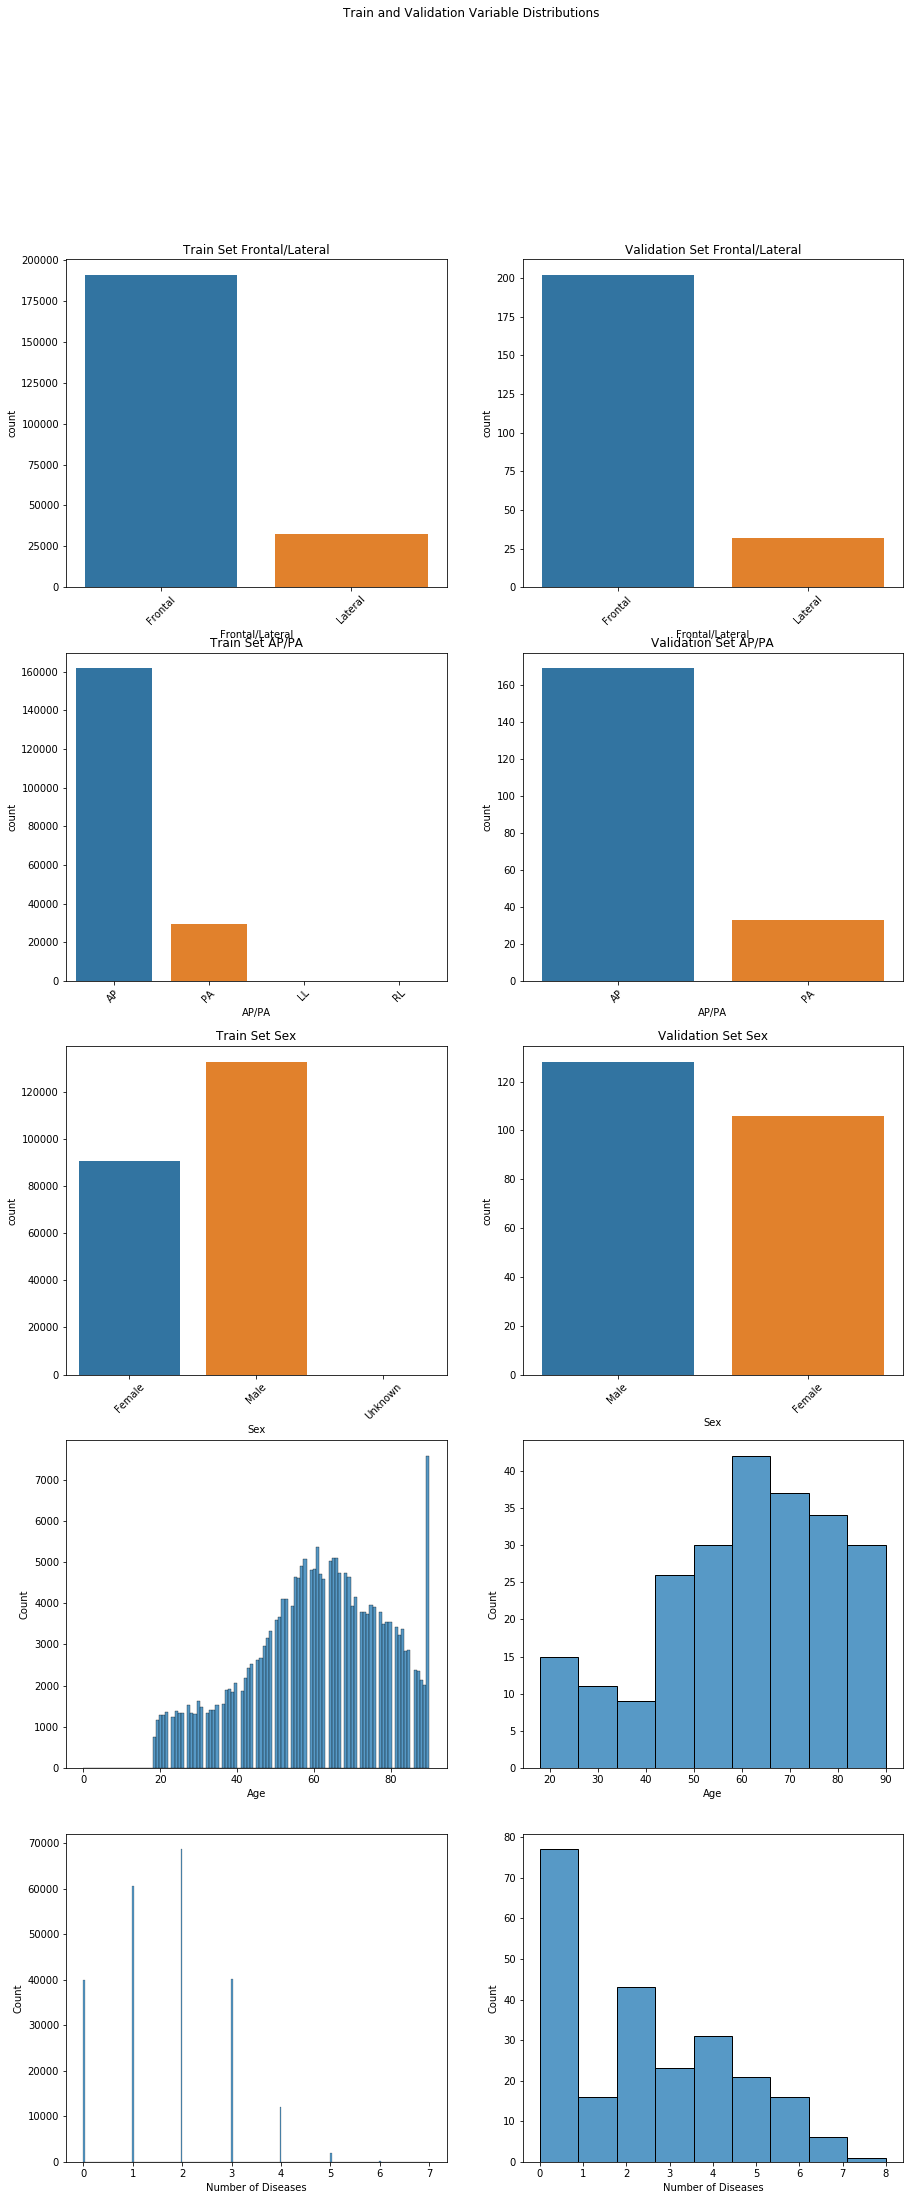

In [10]:
cat_cols = ['Frontal/Lateral','AP/PA','Sex']
fig,ax = plt.subplots(len(cat_cols)+2, 2, figsize=(15,35))
# fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle('Train and Validation Variable Distributions', fontsize=12)
for i,c in enumerate(cat_cols):
    for col in range(2): #go through columns
        ax[i,col].set_xticklabels(ax[i,col].get_xticks(), rotation = 45)
    sns.countplot(x=c, data=train_df,ax=ax[i,0])
    ax[i,0].set_title(f'Train Set {c}')
    sns.countplot(x=c, data=valid_df,ax=ax[i,1])
    ax[i,1].set_title(f'Validation Set {c}')

sns.histplot(train_df['Age'], ax=ax[len(cat_cols),0])
sns.histplot(valid_df['Age'], ax=ax[len(cat_cols),1])
sns.histplot(train_df['Number of Diseases'], ax=ax[len(cat_cols)+1,0])
sns.histplot(valid_df['Number of Diseases'], ax=ax[len(cat_cols)+1,1])

plt.savefig('images/variable_distributions.png')

print(train_df['No Finding'].value_counts())

In [11]:
# EDA on the file paths, do the the images in a study have the same disease label(s)?
# dict w/ patiennum as key, study as 2nd key with diseases 
import collections
p_studies = collections.defaultdict(dict)

for p,l in zip(train_df.Path, list(train_df[label_cols].values)):
    set_nm, group, patient, study, image_nm = p.split('/')
#     print(patient, study, l)
    if study in p_studies[patient]:
        p_studies[patient][study].append([image_nm, l])
    else: 
        p_studies[patient][study] = [[image_nm, l]]

In [12]:
# histogram of how many studies a patient has
import numpy as np 
print(f'Count of patients: {len(p_studies)}')
study_hist = []
images_hist = [] #how many images per study
diff_cnt = 0
for p in p_studies:
    study_hist.append(len(p_studies[p]))
    for s in p_studies[p]:
        images_hist.append(len(p_studies[p][s]))
        #if more than 1 image in a study, check labels
        if len(p_studies[p][s]) > 1:  
            current = None
            for i in p_studies[p][s]:
                label = i[1:]
                if current is None:
                    current = label
                else:
                    if (np.array(current)==np.array(label)).all() == False:
#                     if current==label == False:
                    
                        diff_cnt += 1
                    current = label      

Count of patients: 64540


91


0

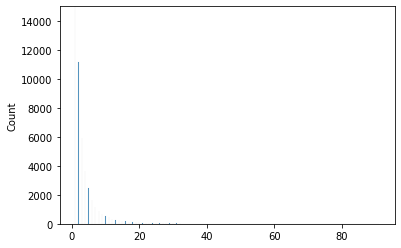

In [13]:


print(max(study_hist))
sns.histplot(study_hist)
plt.ylim(0, 15000)
# p_studies['patient00005']
diff_cnt

Counter({1: 153647, 2: 32215, 3: 1779})
3


(0, 3)

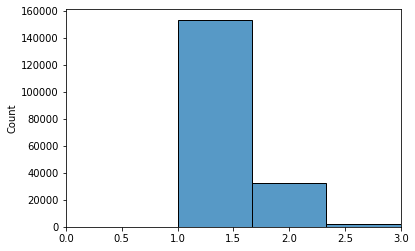

In [14]:
# Histogram of study count
from collections import Counter
print(Counter(images_hist))


print(max(images_hist))
sns.histplot(images_hist, bins=3)
# plt.ylim(0, )
plt.xlim(0,3)


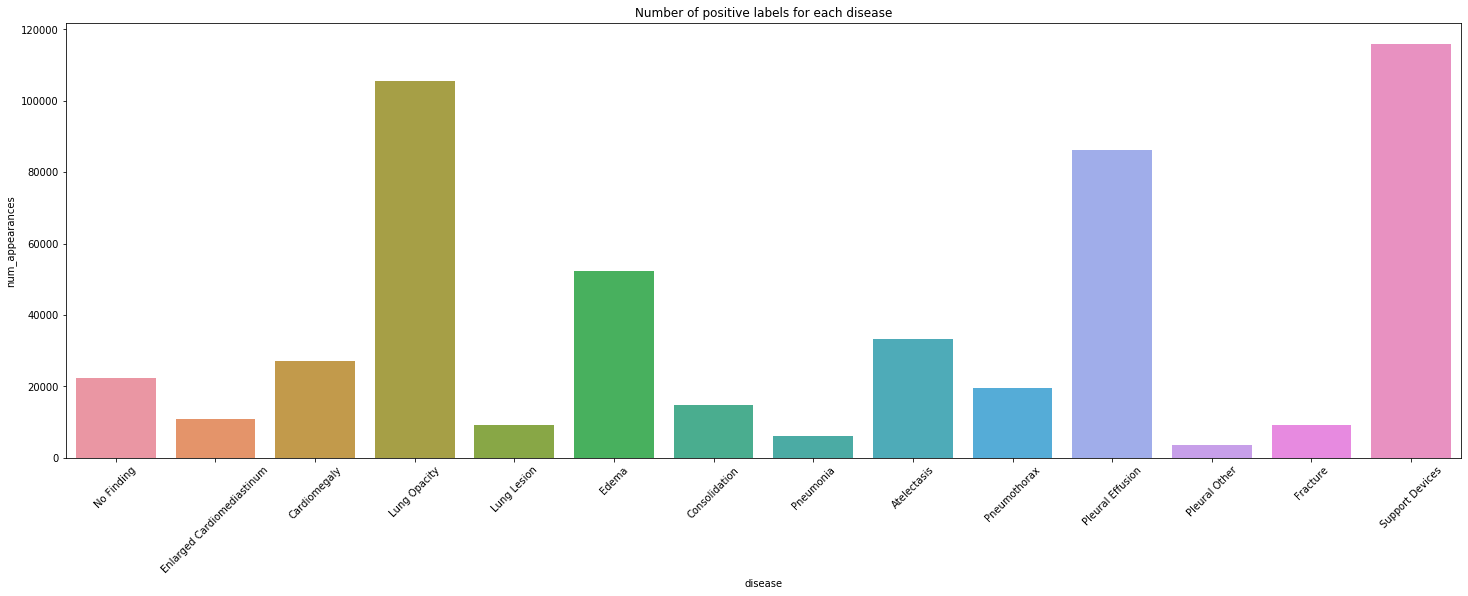

In [15]:
disease_count_df = pd.DataFrame(list(disease_count.items()),columns = ['disease','num_appearances']) 
plt.figure(figsize=(25,8))
ax=sns.barplot(x='disease', y='num_appearances', data=disease_count_df)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
ax.set_title('Number of positive labels for each disease')
plt.savefig('disease_count.png')

In [16]:
disease_counts_df =  pd.read_pickle('disease_count.pkl')
list(disease_counts_df.ratio.values)



[0.056010190496211094,
 0.02702283351852408,
 0.06756959668458512,
 0.26422465139093265,
 0.02298867833868885,
 0.1307496721623272,
 0.036995605473637845,
 0.015113066458452206,
 0.08352603181276715,
 0.048670130234141164,
 0.21568966035016066,
 0.008816581078510867,
 0.022623302001061094]

In [17]:
# using code from https://github.com/kamenbliznashki/chexpert/blob/master/explore_data.ipynb

prevalence = train_df[train_df.columns[5:-1]].apply(pd.Series.value_counts, dropna=False).T
# prevalence['prevalence (-1, 0 $ 1)'] = (prevalence[[-1.0, 0.0, 1.0]].sum(1) / prevalence.sum(1)).round(3) * 100
prevalence/223414 * 100

,-1.0,0.0,1.0
No Finding,NaN,89.982275,10.017725
Enlarged Cardiomediastinum,5.551577,89.615243,4.833180
Cardiomegaly,3.619737,84.295076,12.085187
Lung Opacity,2.505662,50.236333,47.258005
Lung Lesion,0.666028,95.222323,4.111649
Edema,5.811632,70.803083,23.385285
Consolidation,12.417306,80.965830,6.616864
Pneumonia,8.401443,88.895503,2.703054
Atelectasis,15.101560,69.959358,14.939082
Pneumothorax,1.407701,89.887384,8.704916


In [18]:
train_df.groupby('Frontal/Lateral').agg(lambda x: x[x>0].sum()).T

Frontal/Lateral,Frontal,Lateral
Age,11590175.0,1910879.0
No Finding,16974.0,5407.0
Enlarged Cardiomediastinum,9187.0,1611.0
Cardiomegaly,23385.0,3615.0
Lung Opacity,94211.0,11370.0
Lung Lesion,7040.0,2146.0
Edema,49675.0,2571.0
Consolidation,12983.0,1800.0
Pneumonia,4675.0,1364.0
Atelectasis,29720.0,3656.0


In [19]:
train_df.groupby('AP/PA')[label_cols].agg(lambda x: x[x>0].sum()).T

AP/PA,AP,LL,PA,RL
No Finding,11471.0,4.0,5499.0,0.0
Enlarged Cardiomediastinum,7750.0,1.0,1436.0,0.0
Cardiomegaly,20475.0,1.0,2909.0,0.0
Lung Opacity,84471.0,4.0,9736.0,0.0
Lung Lesion,4918.0,0.0,2122.0,0.0
Edema,47965.0,1.0,1709.0,0.0
Consolidation,11484.0,1.0,1498.0,0.0
Pneumonia,3476.0,1.0,1198.0,0.0
Atelectasis,26523.0,2.0,3195.0,0.0
Pneumothorax,15891.0,0.0,1802.0,0.0


#### Co ocurrances
On the positive cases to other positive cases



In [20]:
train_df[label_cols].T.dot(train_df[label_cols]).astype(int)
train_df[label_cols].T

,0,1,2,3,4,5,6,7,8,9,...,223404,223405,223406,223407,223408,223409,223410,223411,223412,223413
No Finding,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Enlarged Cardiomediastinum,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cardiomegaly,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Lung Opacity,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,-1.0,-1.0,0.0,1.0,0.0
Lung Lesion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Edema,0.0,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-1.0,0.0,0.0
Consolidation,0.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Pneumonia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
Atelectasis,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,0.0,1.0,-1.0,-1.0,0.0,1.0,0.0
Pneumothorax,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


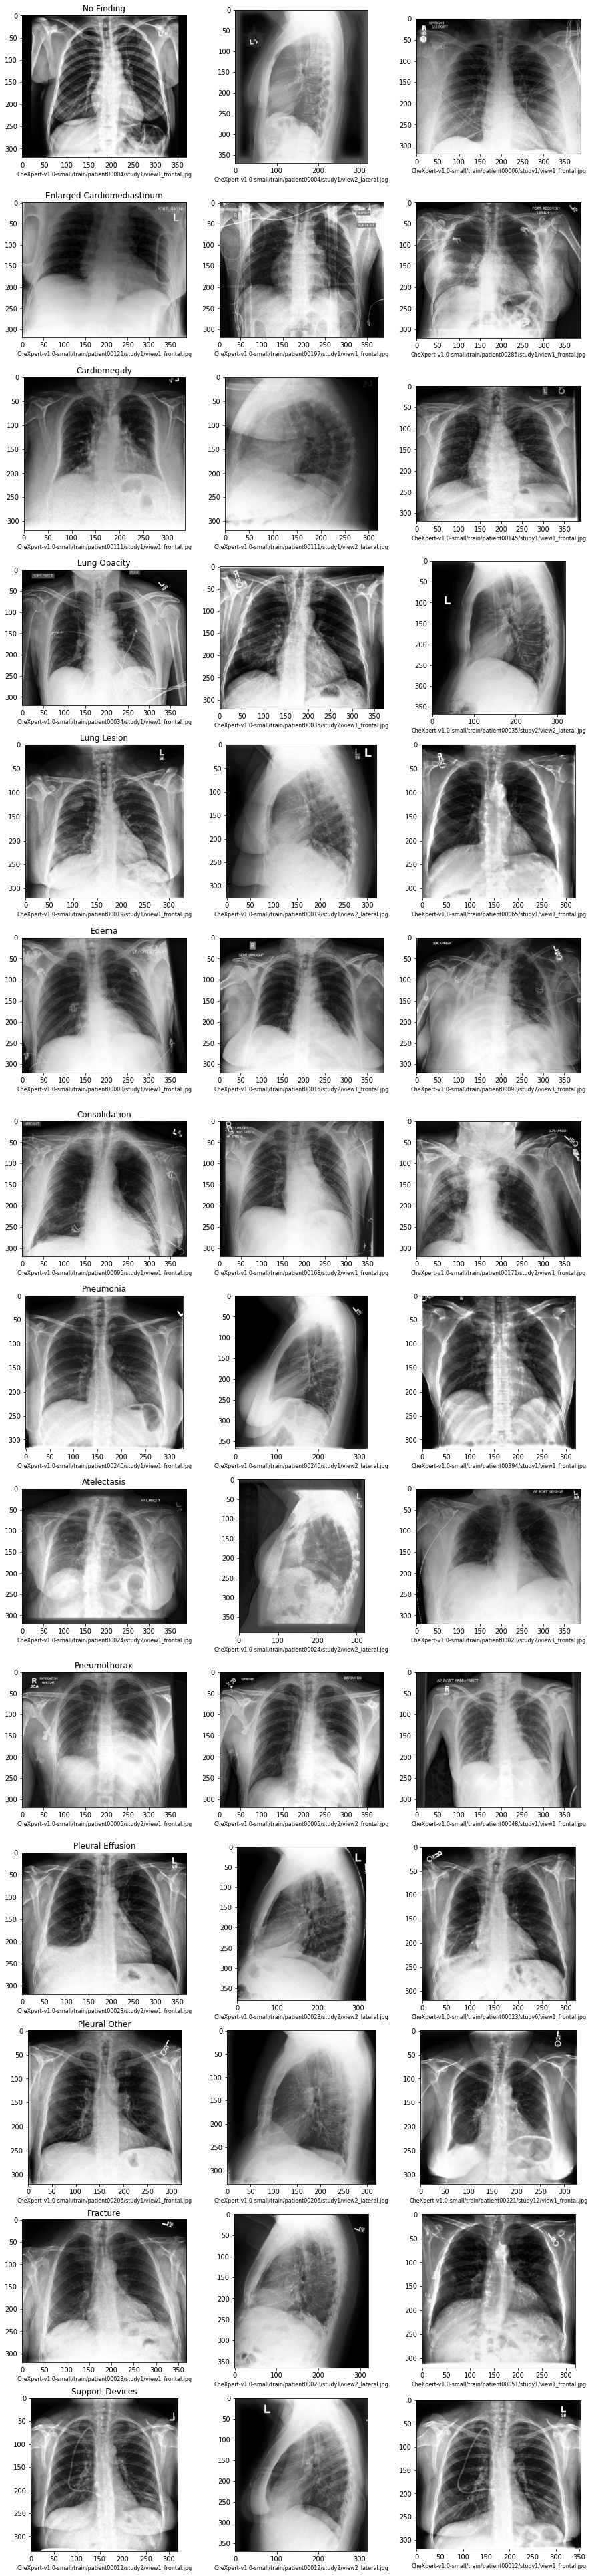

In [22]:

fig, axs = plt.subplots(len(label_cols), 3, figsize=(3*5, 5*len(label_cols)))

for i, a in enumerate(label_cols):
    filenames = train_df.loc[(train_df[a]==1) & (train_df[train_df[label_cols]>0.0][label_cols].sum(1)==1.0), 'Path'].head(3).values
    axs[i,0].set_title(a)
    for j, f in enumerate(filenames):
        img = Image.open('/storage/'+filenames[j])
        axs[i,j].imshow(img, cmap='gray', interpolation='bilinear')
        axs[i,j].set_xlabel(filenames[j], fontsize=8)
        

In [23]:
# saving as pickle files for the modeling notebook
train_df.to_pickle('train_df.pkl')
valid_df.to_pickle('valid_df.pkl')


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as T
from torch.utils.data import DataLoader

from tqdm import tqdm #progress bar
import pprint

#confirm the mean and std on the train set
def compute_mean_and_std(dataset):
    m = 0
    s = 0
    k = 1
    for img, _, _ in tqdm(dataset):
        x = img.mean().item()
        new_m = m + (x - m)/k
        s += (x - m)*(x - new_m)
        m = new_m
        k += 1
    print('Number of datapoints: ', k)
    return m, math.sqrt(s/(k-1))

transform=transforms.Compose([transforms.CenterCrop(320), transforms.ToTensor(), transforms.Normalize(mean=[0.5330], std=[0.0349])]))
m, s = compute_mean_and_std(ds)
print('Dataset mean: {}; dataset std {}'.format(m, s))
        
# load only 